In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

dataf = pd.read_csv("master.csv")

In [2]:
del dataf['age']
del dataf['suicides_no']
del dataf['country-year']
del dataf['HDI for year']
del dataf['generation']
del dataf['population']
del dataf['sex']
del dataf['country']
del dataf['year']
del dataf[' gdp_for_year ($) ']

In [3]:
dataf = dataf.sample(frac=1).reset_index(drop=True)
df = dataf.sample(n = 5000, replace = True)

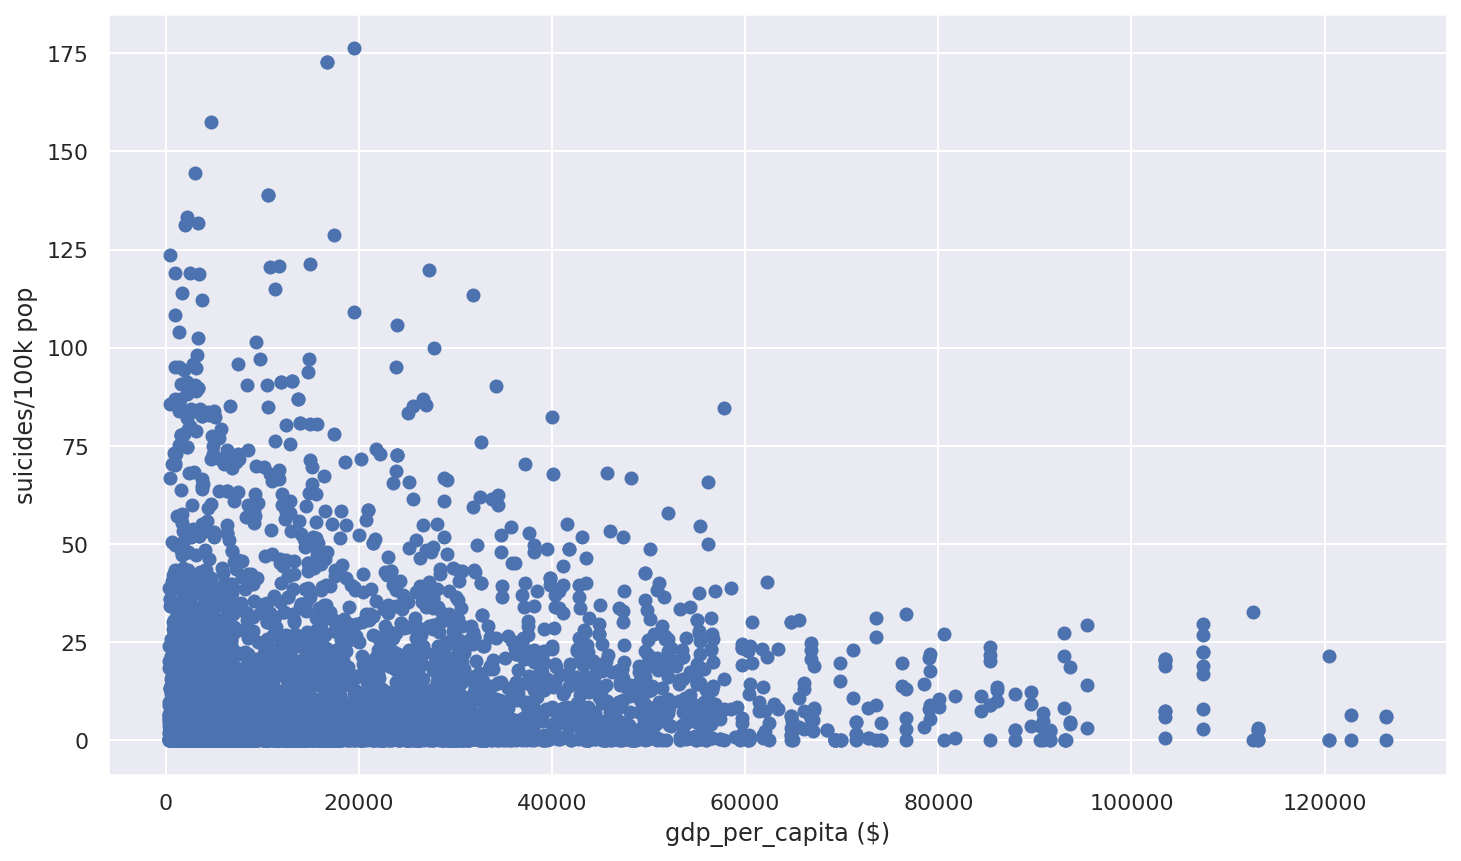

In [4]:
plt.scatter(df['gdp_per_capita ($)'],df['suicides/100k pop'])
plt.xlabel('gdp_per_capita ($)')
plt.ylabel('suicides/100k pop')
plt.show()

In [5]:
X=df.iloc[:,[1,0]].values

In [6]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(X)
x_scaled

array([[-0.32709121,  1.27971792],
       [ 2.34224198, -0.18413772],
       [-0.11222069, -0.57669785],
       ...,
       [-0.46272565,  1.42706095],
       [ 1.52807448, -0.67244422],
       [-0.54660145, -0.16817999]])

In [7]:
wcss =[]

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[9999.999999999978,
 6533.575384006404,
 3483.9990767372747,
 2672.1153586674986,
 1975.7170718337902,
 1620.1950219259672,
 1367.9410177503876,
 1178.3048992685615,
 1025.9769886221754,
 918.9070908316404]

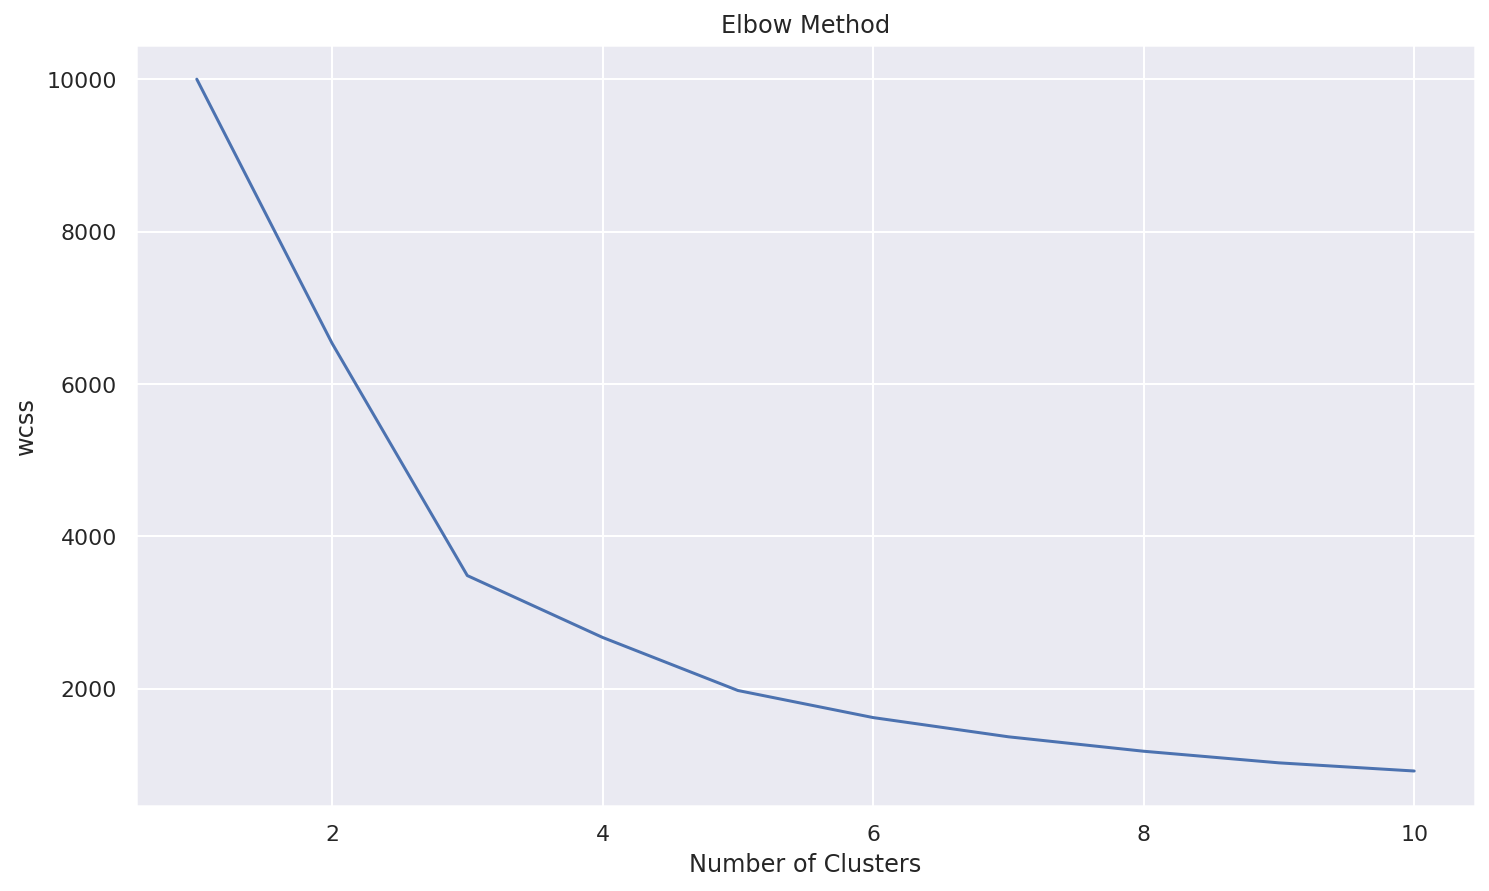

In [8]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=5,init='k-means++', max_iter=5000, n_init=10, random_state=0)
y_means = km4.fit_predict(x_scaled)

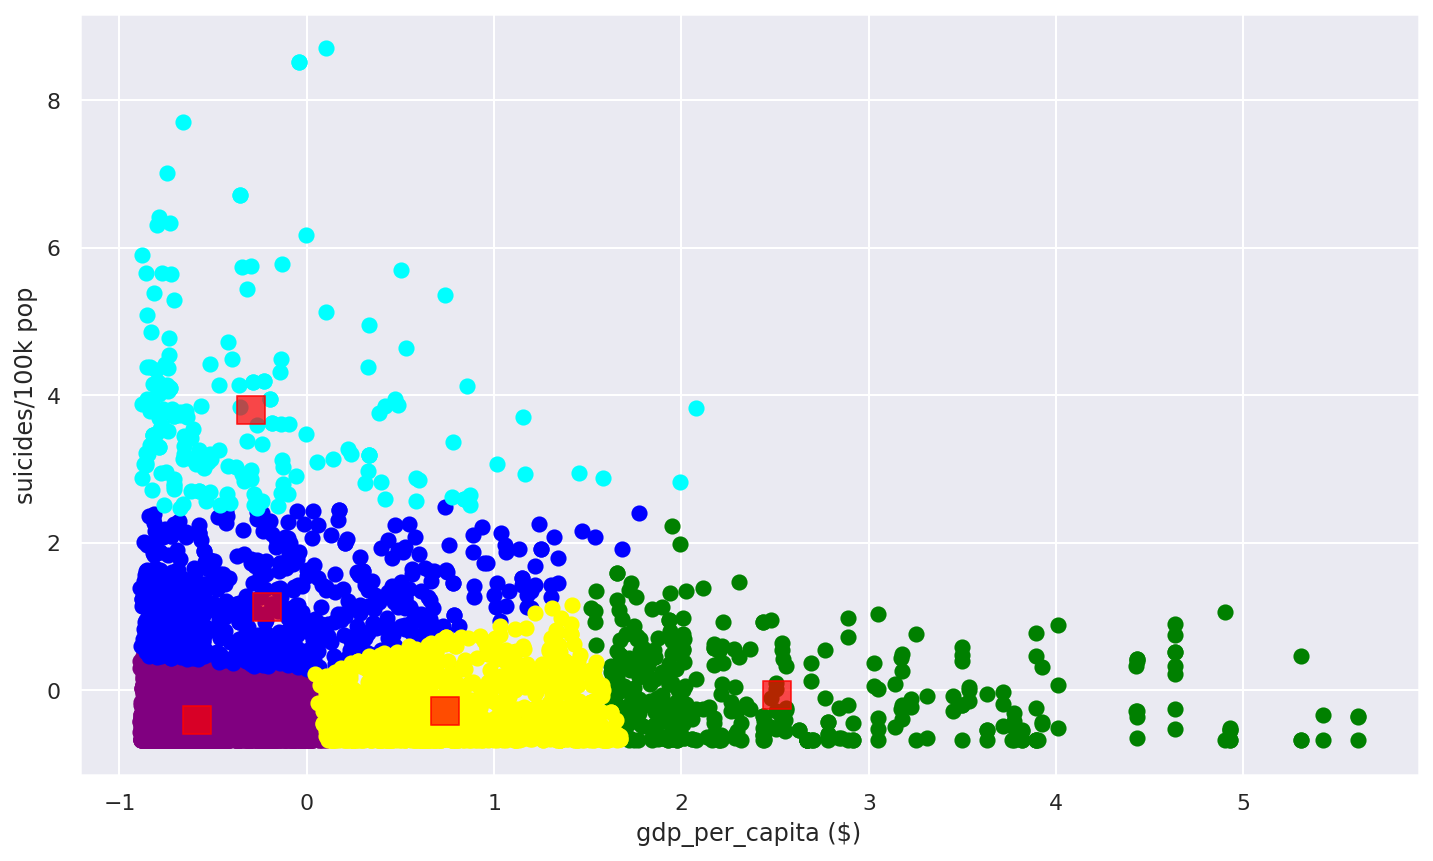

In [10]:
#Visualising the clusters for k=5
plt.scatter(x_scaled[y_means==0,0],x_scaled[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(x_scaled[y_means==1,0],x_scaled[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(x_scaled[y_means==2,0],x_scaled[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(x_scaled[y_means==3,0],x_scaled[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(x_scaled[y_means==4,0],x_scaled[y_means==4,1],s=50, c='yellow',label='Cluster5')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')

plt.xlabel('gdp_per_capita ($)')
plt.ylabel('suicides/100k pop')
plt.show()

In [11]:
dataf = dataf.sample(frac=1).reset_index(drop=True)
testf = dataf.sample(n = 5000, replace = True)
X_test=testf.iloc[:,[1,0]].values
x_test_scaled = preprocessing.scale(X)
kmeans.score(x_test_scaled)

-918.9070908316404